In [2]:
my_bearer_token = "AAAAAAAAAAAAAAAAAAAAAJmhZgEAAAAAELa0jicJTr0DqoxIwgwAE5%2FRvM0%3DVn98L58j7FYGeeifzpFcjZYeKsphgQ4xyyRJqG48IPd6Nwpfdk"

In [3]:
#!pip install -U tweepy

In [33]:
import tweepy
import time
import pandas as pd
#tweets_text = []

In [34]:
#create the client object with the bearer token of your App
client = tweepy.Client(bearer_token=my_bearer_token)

In [69]:
def extract_tweets(label):
  tweets_text = []
  response = client.search_recent_tweets(label,max_results=100)
  tweets = response.data
  for tweet in tweets:
    tweets_text.append(tweet.text)
  return tweets_text

In [77]:
%%time
label_1 = ['#elonmusk', '#elonmusk #tesla', '#elonmusk #starlink', '#elonmusk #spacex',
            '#elonmusk #twitter', '#elonmusk #boringcompany', '#elonmusk #neuralink',
           '#elonmusk #billgates', '#elonmusk #sec', '#elonmusk #dogecoin']

label_2 = ['#electricvehicle','#ev','#tesla','#electriccar','#electricbike','#evcharging',
           '#emobility','#electricscooter','#chargingstation','#evchargers']

label_3 = ['#climatechange','#ClimateCrisis','#ClimateAction','#COP26','#COP27',
           '#ClimateEmergency','#GlasgowClimatePact','#ParisAgreement','#ClimateJustice',
          '#ActOnClimate','#ClimateActionNow']

label_4 = ['#makeinindia','#makeinindia #modi','#madeinindia','#AtmanirbhartaSeShakti',
           '#AtmaNirbharBharat','#AtmaNirbharBharat #modi','#aatmanirbharta','#atmanirbhar',
           '#swadeshi']

label_5 = ['#ramadan','#ramadan2022','#ramzan','#ramzan2022','#eid',
           '#eid2022','#eidmubarak','#hariraya','#hariraya2022','#HariRayaAidilfitri',
           '#eidmubarak2022','#EidUlFitr','#EidUlFitr2022','#HariRayaAidilfitri2022']

label_dict = {'elonmusk' : label_1,
            'electricvehicle' : label_2,
            'climatechange' : label_3,
            'makeinindia' : label_4,
            'ramadan' : label_5
           }

final_df = pd.DataFrame([])
for label, items in label_dict.items():
    for item in items:
        print(item)
        tweets_text = extract_tweets(label = f"{item} lang:en -is:retweet")
        df = pd.DataFrame({'Tweets': tweets_text, 'label': label}) 
        final_df = final_df.append(df)
        time.sleep(1)
    print(label)

#elonmusk
#elonmusk #tesla
#elonmusk #starlink
#elonmusk #spacex
#elonmusk #twitter
#elonmusk #boringcompany
#elonmusk #neuralink
#elonmusk #billgates
#elonmusk #sec
#elonmusk #dogecoin
elonmusk
#electricvehicle
#ev
#tesla
#electriccar
#electricbike
#evcharging
#emobility
#electricscooter
#chargingstation
#evchargers
electricvehicle
#climatechange
#ClimateCrisis
#ClimateAction
#COP26
#COP27
#ClimateEmergency
#GlasgowClimatePact
#ParisAgreement
#ClimateJustice
#ActOnClimate
#ClimateActionNow
climatechange
#makeinindia
#makeinindia #modi
#madeinindia
#AtmanirbhartaSeShakti
#AtmaNirbharBharat
#AtmaNirbharBharat #modi
#aatmanirbharta
#atmanirbhar
#swadeshi
makeinindia
#ramadan
#ramadan2022
#ramzan
#ramzan2022
#eid
#eid2022
#eidmubarak
#hariraya
#hariraya2022
#HariRayaAidilfitri
#eidmubarak2022
#EidUlFitr
#EidUlFitr2022
#HariRayaAidilfitri2022
ramadan
Wall time: 1min 20s


In [80]:
final_df.to_csv('final_dataset_casestudy.csv', index=False)

In [78]:
final_df.shape


(4121, 2)

In [79]:
final_df["Tweets"].nunique()

3545

In [88]:
x = final_df.drop_duplicates(subset=['Tweets'])
x.label.value_counts()

climatechange      931
electricvehicle    776
elonmusk           770
ramadan            673
makeinindia        395
Name: label, dtype: int64

In [87]:
x.head()

,Tweets,label
0,@cz_binance What's the rationale for the DOD g...,elonmusk
2,@richards_crypto @kryptochay ⚡️The Future is N...,elonmusk
3,@WatcherGuru What's the rationale for the DOD ...,elonmusk
4,Just stack #Bitcoin and hold. Life changing. #...,elonmusk
5,@JP_9_1988 @disberam @bitcoinlfgo ⚡️The Future...,elonmusk


In [90]:
x.tail()

,Tweets,label
37,Glimpse of Eid-ul-fitr🌿\nMoments of CBD people...,ramadan
0,13.5.2022 - She'll be nursing me while I recup...,ramadan
1,Food glorious food #syawal2022🌙 #harirayaaidil...,ramadan
2,We may be staying within the Klang Valley but ...,ramadan
3,9.5.2022 - Day out with @edahnasir. Lunch at M...,ramadan


Text(0.5, 1.0, 'Distribution of Labels')

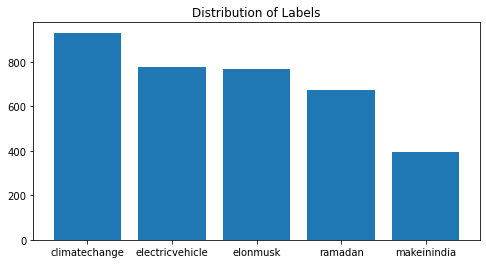

In [91]:
import matplotlib.pyplot as plt
count = x.label.value_counts()
plt.figure(figsize=(8,4))
plt.bar(count.index,count.values)
plt.title('Distribution of Labels')